In [1]:
from src.dispersion import * 
from src.VSH import * 
from src.extra_special import * 
from src.fields import (
    E_,
    H_,
    E_cart_,
    H_cart_
)
from src.AM import *
from src.misc import *

import numpy as np
import scipy.constants as const
import scipy.special as sp
from scipy import integrate
from cxroots import Rectangle, AnnulusSector, Circle
import cxroots
from icecream import ic

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe  # for text effects 
plt.rcParams.update({'font.size': 18})

Z_0 = np.sqrt(const.mu_0 / const.epsilon_0)  # vacuum impedance

In [2]:
particle_type = "dielectric"  # "dielectric" or "metallic"
eps_dielectric = 10 + 0.0j
mu_dielectric = 1.0 + 0.0j

n = 1  # m = -n, ..., n

a = 50*const.nano

mode_type = "TE"  # "TE" or "TM"

eps_out = 1
mu_out = 1

n_in = np.sqrt(eps_dielectric * mu_dielectric)
n_out = np.sqrt(eps_out * mu_out)

In [3]:
ka = 0.5

omega = const.speed_of_light / a / np.sqrt(eps_out * mu_out) * ka * (1 - 0.2j)
k0 = omega / const.speed_of_light

part = "both"

n, m = 1, 1

rrmax = np.linspace(10*a, stop=40/k0, num=20)
W = np.array([])
W_analit = np.array([])

Jz = np.array([])
Lz = np.array([])
Sz = np.array([])

dr_NF = a/100
dr_FF = 2*np.pi/(np.sqrt(eps_out*mu_out) * k0) / 100

for rmax in rrmax:
    ic(int(2*a / dr_NF), int((rmax-2*a)/dr_FF))
    
    rr = np.append(
        np.linspace(1e-13, stop=2*a, num=int(2*a / dr_NF), endpoint=False),
        np.linspace(2*a, stop=rmax, num=int((rmax-2*a)/dr_FF))
    )
    tt = np.linspace(0, stop=np.pi, num=50)
    phi = 2.0
    
    W = np.append(
        W, 
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * W_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )
    
    Jz = np.append(
        Jz,
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Jz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )
    
    Lz = np.append(
        Lz,
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Lz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )
    
    Sz = np.append(
        Sz,
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Sz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )

/tmp/ipykernel_25175/3035199140.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  ic(int(2*a / dr_NF), int((rmax-2*a)/dr_FF))
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 63
/tmp/ipykernel_25175/3035199140.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  np.linspace(2*a, stop=rmax, num=int((rmax-2*a)/dr_FF))
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 92
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 122
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 151
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 180
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 210
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 239
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 268
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 298
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 327
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 356
ic| int(2*a / dr_NF): 200, int((rmax-2*a)/dr_FF): 386
ic| int(2*a / dr_NF): 2

/usr/lib64/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib64/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


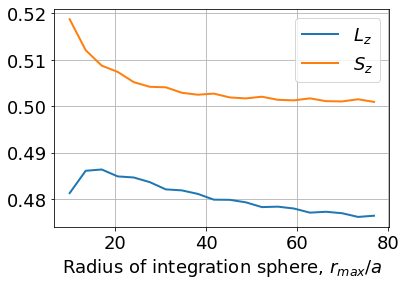

In [11]:
#plt.plot(rrmax/a, np.real(omega)*Jz/W, c='k', lw=3, label='$J_z$')

plt.plot(rrmax/a, np.real(omega)*Lz/W, lw=2, label='$L_z$')
plt.plot(rrmax/a, np.real(omega)*Sz/W, lw=2, label='$S_z$')

plt.legend()
plt.grid()
#plt.ylim(0, 1)

plt.xlabel('Radius of integration sphere, $r_{max}/a$')

plt.show()

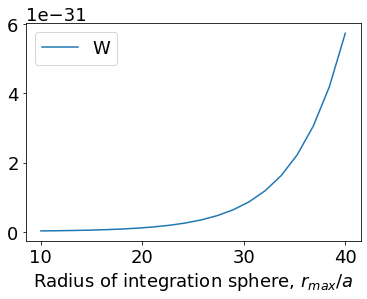

In [60]:
plt.plot(rrmax/a, W, label='W')
plt.legend()
plt.xlabel('Radius of integration sphere, $r_{max}/a$')
plt.show()

In [38]:
W = np.array([], dtype=float)
Jz = np.array([], dtype=float)
Lz = np.array([], dtype=float)
Sz = np.array([], dtype=float)


particle_type = "dielectric"  # "dielectric" or "metallic"
eps_dielectric = 10 + 0.0j
mu_dielectric = 1.0 + 0.0j

n = 1  # m = -n, ..., n

a = 50*const.nano

mode_type = "TE"  # "TE" or "TM"

eps_out = 1
mu_out = 1

n_in = np.sqrt(eps_dielectric * mu_dielectric)
n_out = np.sqrt(eps_out * mu_out)


xx = np.linspace(0.01, stop=0.4, num=20)
ww = const.speed_of_light/np.sqrt(eps_out * mu_out) * 1/a * xx

for omega in ww:
    k0 = omega / const.speed_of_light
    k_host = np.sqrt(eps_out*mu_out) * k0
    k_in = np.sqrt(eps_dielectric * mu_dielectric) * k0

    part = "both"

    n, m = 1, 1

    rmax = 2*np.pi / k_host * 40

    dr_NF = np.min([2*np.pi/np.real(k_in), a]) / 70
    dr_FF = 2*np.pi/np.real(k_host) / 50
    
    ic(int(2*a / dr_NF), int((rmax-2*a)/dr_FF))
    
    rr = np.append(
        np.linspace(1e-13, stop=2*a, num=int(2*a / dr_NF), endpoint=False),
        np.linspace(2*a, stop=rmax, num=int((rmax-2*a)/dr_FF))
    )
    tt = np.linspace(0, stop=np.pi, num=50)
    phi = 2.0
    
    W = np.append(
        W, 
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * W_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )
    
    Jz = np.append(
        Jz,
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Jz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )
    
    Lz = np.append(
        Lz,
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Lz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )
    
    Sz = np.append(
        Sz,
        nsimpson(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Sz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )

ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1999
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1999
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1999
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1998
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1998
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1998
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1997
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1997
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1997
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1996
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1996
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1996
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1995
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1995
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1995
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1994
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1994
ic| int(2*a / dr_NF): 140, int((rmax-2*a)/dr_FF): 1994
ic| int(2*

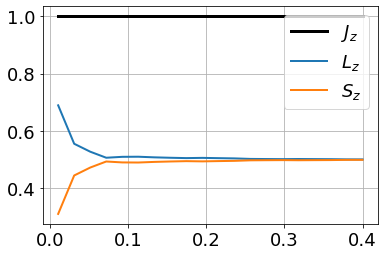

In [39]:
plt.plot(xx, ww*Jz/W, c='k', lw=3, label='$J_z$')

plt.plot(xx, ww*Lz/W, lw=2, label='$L_z$')
plt.plot(xx, ww*Sz/W, lw=2, label='$S_z$')

#plt.xscale('log')
plt.legend()
plt.grid()
#plt.ylim(0, 3)

plt.show()

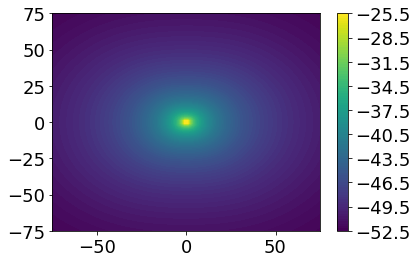

In [51]:
ka = 0.01

omega = const.speed_of_light / a / np.sqrt(eps_out * mu_out) * ka

N = 100
boxSize = 75*a

part = "both"

n = 1
m = 1

xx = np.linspace(-boxSize, stop=boxSize, num=N)
y = 0
zz = np.linspace(-boxSize, stop=boxSize, num=N)


X, Z = np.meshgrid(xx, zz, sparse=False, indexing='ij')

R, THETA, PHI = cart2sph(X, y, Z)

W = W_(
    m, n, 
    R, THETA, PHI, 
    mode_type, a, omega, particle_type, 
    eps_out, mu_out, eps_dielectric, mu_dielectric, part=part
)
plt.contourf(X/a, Z/a, np.log(W), cmap='viridis', levels=90)
plt.colorbar()
plt.show()